# Geodatenanalyse 1


## Tag 2 / Block 1 - Teil 9

## Numerische und symbolische Berechnungen

Ca. 20 Minuten

In [1]:
import numpy as np

## Inhalt
- Übersicht über *mpmath*
- Übersicht über *SymPy*


## Was ist *mpmath*?

<img width=200 style="float: left;" src="images\mpmath.svg">

- *mpmath* kann als Ersatz für Pythons float/complex-Typen und math/cmath-Module mit beliebiger Genauigkeit verwendet werden, beherrscht aber auch wesentlich fortgeschrittenere Mathematik. 

- Fast jede Berechnung kann genauso gut mit 10- oder 1000-stelliger Genauigkeit durchgeführt werden, entweder mit reellen oder komplexen Zahlen

- *mpmath* implementiert in vielen Fällen effiziente Algorithmen, die für extrem hochpräzise Arbeiten gut skalieren

Weitere Infos unter der [Paketbeschreibung für *mpmath*](https://mpmath.org)

In [2]:
from mpmath import mp

### Beliebige Präzision für Fließkommazahlen

- *mpmath* kann also für eine beliebige Genauigkeit von Berechnungen verwendet werden

- Der Standard in *NumPy* ist ca. 15 Dezimalstellen

- Die Dezimalpräzision von *mpmath* muss entsprechend eingestellt werden

Oder als grafische Darstellung:

<img width=500 style="float: left;" src="images\double.png">

Wie werden Fließkommazahlen intern gespeichert?

<img width=200 style="float: left;" src="images\floats.svg">

**Hinweis**: Für eine Fließkommazahl mit doppelter Präzision ergibt sich hiermit eine Genauigkeit von ~15.9 Nachkommastellen

In [3]:
# Kreiszahl Pi in NumPy
print(np.pi)

3.141592653589793


In [4]:
# Kreiszahl Pi in mpmath
mp.dps = 50
mp.nprint(mp.pi, 50)

3.1415926535897932384626433832795028841971693993751


### Zahlen definieren

- *mpmath* braucht intern ein eigenes Speicherobjekt für Zahlen

- Der Grund ist, dass beliebige Präzisionen eine andere Speicherverarbeitung benötigen

- Das Praktische ist, dass alles intern geregelt wird

Es gibt drei Zahlentypen:

- Fließkomma: *mpf()*

- Komplex: *mpc(real, imaginary)*

- Matrix: *matrix()*

Die Konvertierung ist ganz einfach:

In [5]:
# von String nach mpmath
value = mp.mpmathify('1.56789654')
print(value)

1.56789654


### Genauigkeit

Normale Fliesskommaoperationen haben eine begrenzte Genauigkeit:

In [6]:
print(1/6)

0.16666666666666666


In *mpmath* kann diese Genauigkeit beliebig angepasst werden:

In [7]:
mp.nprint(mp.fdiv(1, 6, dps=100), 100)

0.1666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666667


### Große und kleine Zahlen

Ein weiteres Beispiel ist die Reichweite von Zahlen, z.B. in *NumPy*:

In [8]:
min_value = -np.finfo(np.float64).max
print(min_value)

value = -1.7976931348623157e+309
print(value)

-1.7976931348623157e+308
-inf


In [9]:
max_value = np.finfo(np.float64).max
print(max_value)

value = 1.7976931348623157e+309
print(value)

1.7976931348623157e+308
inf


In *mpmath*, diese können beliebig angepasst werden:

In [10]:
# eine sehr große Zahl
print(mp.mpf('1.45e+500'))

1.45e+500


In [11]:
# eine sehr kleine Zahl
print(mp.mpf('1.45e-500'))

1.45e-500


## Wurzelsuche

- Berechnungsprobleme von analytischen Gleichungen sind oft nicht explizit lösbar

- FÜr eine Berechnung von Lösungen benötigt man eine Iteration

- Diese lässt sich mit *mpmath* sehr genau berechnen

Man finde $(x, ...)$ für welche gilt:

$f(x, ...) = 0$

In [12]:
root = mp.findroot(mp.sin, 1)
mp.nprint(root, 50)

root = mp.findroot(mp.sin, 2)
mp.nprint(root, 50)

0.0
3.1415926535897932384626433832795028841971693993751


*HINWEIS*: Es wird immer der Wert, der dem Startwert am nächsten liegt, gefunden!

In [13]:
root = mp.findroot(mp.sin, 2, verbose=True)
mp.nprint(root, 50)

x:     3.7323352311858883240062645623172913036110961827885886423
error: 0.25
x:     3.1139109832498230716511235569414417040838978259571341738
error: 1.4823352311858883240062645623172913036110961827885886423
x:     3.1431877351979023357707663048591772020460079912756894676
error: 0.61842424793606525235514100537584959952719835683145446844
x:     3.1415924616005042552341086595358394436792065219791972602
error: 0.029276751948079264119642747917735497962110165318555293806
x:     3.1415926535898746412765027067321058589458723440407032878
error: 0.0015952735973980805366576453233377583668014692964922074903
x:     3.1415926535897932384626433827794200083644198996892138584
error: 0.00000019198937038604239404719626641526666582206150602768376694
x:     3.1415926535897932384626433832795028841971693993751058215
error: 0.000000000000081402813859323952685850581452444351489429440892159753236
x:     3.141592653589793238462643383279502884197169399375105821
error: 5.0008287583274949968589196313054599041587080

Das funktioniert auch mit einer beliebigen definierten Funktion, und sogar mit mehreren Variablen:

In [14]:
def function(x1, x2):
    return x1**2 + x2, 5*x1**2 - 3*x1 + 2*x2 - 3

root = mp.findroot(function, (1, 1))
mp.nprint(root, 20)

[ 1.6180339887498948482]
[-2.6180339887498948482]


## Numerische Integration

- Viele Berechnungsprobleme benötigen die Integration von Gleichungen

- Diese sind oft analytisch nicht lösbar

- Dafür kann man sie aber numerisch ausrechnen

Folgende einfache Beispielrechnung:

$y = \int_{0.1}^{2.8} sin(x) dx$

In [15]:
value = mp.quad(mp.sin, [0.1, 2.8])

mp.nprint(value, 20)

1.9372265059466838586


### Anwendungsbeispiel Pumpversuch

Auswertung eines Pumpversuchs anhand von [Theis (1935)](https://doi.org/10.1029/TR016i002p00519).

Hier wird die folgende Integralexponentialfunktion verwendet:

$Ei_1(x) = \int_{x}^{\infty} \frac{e^{-t}}{t} dt$


In [16]:
def exp_int(x):
    return mp.exp(-x)/x

value = mp.quad(exp_int, [1, mp.inf])
mp.nprint(value, 20)

0.21938393439552027368


**Hinweis**: Diese Funktion ist so wichtig, dass sie bereits in *mpmath* integriert ist:

In [17]:
value = mp.e1(2)
mp.nprint(value, 20)

0.048900510708061119567


**Hinweis**: Man könnte diese Funktionalität mit einer Ausgleichungsrechnung kombinieren, um somit einen Pumpversuch auswerten zu können!

**Hinweis**: *mpmath* hat eine der besten Sammlungen an integrierten mathematischen Funktionen! Siehe [Mathematical functions](https://mpmath.org/doc/current/functions/index.html)

## Was ist *SymPy*?

<img width=200 style="float: left;" src="images\sympy_logo.png">

- SymPy ist eine Python-Bibliothek für symbolische Mathematik. 

- SymPy zielt darauf ab, ein vollwertiges Computer-Algebra-System (CAS) zu werden und dabei den Code so einfach wie möglich zu halten, um verständlich und leicht erweiterbar zu sein. 

- SymPy ist komplett in Python geschrieben.

Weitere Infos unter [SymPy](https://www.sympy.org)

In [18]:
import sympy as sp
sp.init_printing()

### Symbolische Mathematik

- Bis jetzt haben wir ausschließlich numerische Berechnungen gemacht

- Mit *SymPy* lassen sich symbolische Berechnungen durchführen

- Das bietet einige Vorteile für bestimmte Aufgaben

In [28]:
x, y = sp.symbols('x y')

expr = x + 2*y

In [26]:
expr1 = sp.expand(x*expr)
expr1

### Variablen ersetzen

Variablen können entweder durch Symbole oder aber auch durch Zahlen ersetzt werden:

In [29]:
x, y, z = sp.symbols('x y z')

# eine Funktion
expr = x**2 + 4*x*y - z

# ersetze beliebige Variablen
expr.subs([(y, x - 3)])

Wenn sie durch Zahlen ersetzt werden, dann ist es eine numerische Lösung:

In [30]:
expr.subs([(x, 5), (y, 1), (z, 2)])

### Variablen ausrechnen

Hierfür ist die Funktion *evalf()* zuständig:

In [31]:
expr.evalf(subs={x: 1.34, y: 4.56, z: 5.67})

### Ableitungen und Integrationen

Die folgende Funktion wird definiert:

$f(x) = x \cdot sin(x^2) + 2$ 

Wie heißt die Ableitung?

In [32]:
# Funktion definieren
expr = x*sp.sin(x**2) + 2
expr

**Hinweis**: Hier muss man die Produkt- und Kettenregeln anwenden ... könnt ihr euch noch erinnern?

In [33]:
# Funktion ableiten
diff_expr = sp.diff(expr)
diff_expr

**Frage**: Was ist der Wert dieser Funktion für $x = \pi$?

In [34]:
diff_expr.evalf(subs={x: np.pi})

Was ist die Integration dieser Funktion?

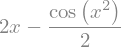

In [35]:
# Funktion integrieren
int_expr = sp.integrate(expr)
int_expr

Und der numerische Wert?

In [36]:
int_expr.evalf(subs={x: np.pi})

Oder auch komplizierter:

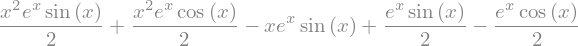

In [39]:
expr = sp.integrate(x**2 * sp.exp(x) * sp.cos(x), x)
expr

Mit Vereinfachung:

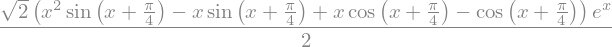

In [40]:
expr = sp.simplify(expr)
expr

### Lineare Gleichungssysteme

Auch einfache Gleichungssysteme können symbolisch gelöst werden:

In [41]:
# definiere die Gleichungen
eq1 = x + y + z - 1
eq2 = y + 2*z - 3

# finde die Lösung
sol = sp.linsolve([eq1, eq2], (x, y, z))
print(sol)

FiniteSet((z - 2, 3 - 2*z, z))


**Achtung**: *SymPy* sollte nur für symbolische Lösungen verwendet werden. Für rein numerische Lösungen ist *SymPy* zu langsam.

### Nicht-lineare Gleichungssysteme

Eine besondere Stärke liegt in der Lösung von nicht-linearen Systemen.

Zum Beispiel:

<img width=150 style="float: left;" src="images\non-linear.png">

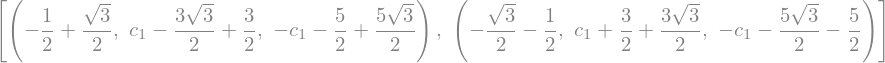

In [42]:
# Symbole definieren
x,y,z = sp.symbols('x,y,z')

# Parameter definieren
c1 = sp.Symbol('c1')

# Gleichungen aufstellen
f = sp.Eq(2*x**2 + y + z, 1)
g = sp.Eq(x + 2*y + z, c1)
h = sp.Eq(-2*x + y, -z)

# Gleichungssystem lösen ...
solution = sp.solve([f, g, h], (x, y, z))
solution

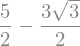

In [43]:
solution[0][1].subs([(c1, 1)])

In [44]:
solution[0][0].evalf()

### Gewöhnliche Differentialgleichungen

*SymPy* kann gewöhnliche Differentialgleichungen lösen.

Ein Beispiel:

In [ ]:
# Symbol definieren
x = sp.symbols('x')

# Funktionssymbole definieren
f, g = sp.symbols('f g', cls=sp.Function)

# Differentialgleichung definieren
diffeq = sp.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sp.sin(x))
diffeq

In [ ]:
# Differentialgleichung lösen
soln = sp.dsolve(diffeq, f(x))
soln

Weitere Beispiele siehe ...

## *SciPy* als übergreifende Bibliothek

[SciPy](https://www.scipy.org) (ausgesprochen "Sigh Pie") ist ein Python-basiertes Ökosystem von Open-Source-Software für Mathematik, Wissenschaft und Technik

<img width=600 style="float: left;" src="images\scipy.png">

**Hinweis**: Die *SciPy* Kernbibliothek enthält einige wertvolle Funktionen, siehe auch [SciPy Referenz](https://docs.scipy.org/doc/scipy/reference/py-modindex.html)

### ENDE
